<a href="https://colab.research.google.com/github/JiaYong02/Suicidal-Detection-NLP/blob/main/Q3_POS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('tagsets')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

Data = 'The big black dog barked at the white cat and chased away.'



[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
"""### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

from IPython.display import display"""


"### CREATE VIRTUAL DISPLAY ###\n!apt-get install -y xvfb # Install X Virtual Frame Buffer\nimport os\nos.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8\nos.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.\n\n%matplotlib inline\n\n### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###\n!apt install ghostscript python3-tk\n\nfrom IPython.display import display"

In [ ]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
data_2 = open('Data_2.txt','r')
input_data = data_2.read()


In [ ]:
from nltk.tokenize import word_tokenize
token = word_tokenize(input_data)
print(nltk.pos_tag(token))

[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')]


In [ ]:
from textblob import TextBlob
blob = TextBlob(input_data)
print(blob.tags)

[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')]


In [ ]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN'),                    # nouns (default)
     (r'^\d+$', 'CD'),
     (r'.*ing$', 'VBG'),               # gerunds, i.e. wondering
     (r'.*ment$', 'NN'),               # i.e. wonderment
     (r'.*ful$', 'JJ')                 # i.e. wonderful
 ]

tagger = nltk.tag.sequential.RegexpTagger(patterns)

import nltk
from nltk.tokenize import word_tokenize
token = word_tokenize(input_data)
print(tagger.tag(token))



regexp_tagger = nltk.RegexpTagger(patterns)


[('The', 'NN'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'NN'), ('the', 'NN'), ('white', 'NN'), ('cat', 'NN'), ('and', 'NN'), ('chased', 'VBD'), ('away', 'NN'), ('.', 'NN')]


['The', 'big', 'black', 'dog', 'barked', 'at', 'the', 'white', 'cat', 'and', 'chased', 'away']

a


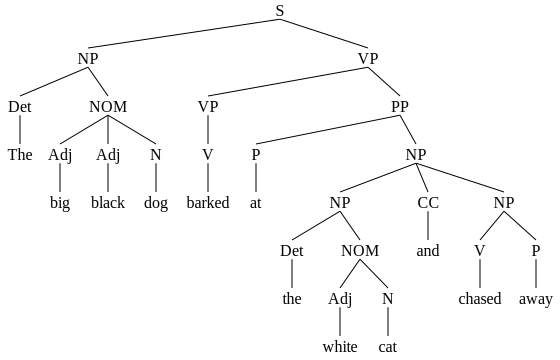

a


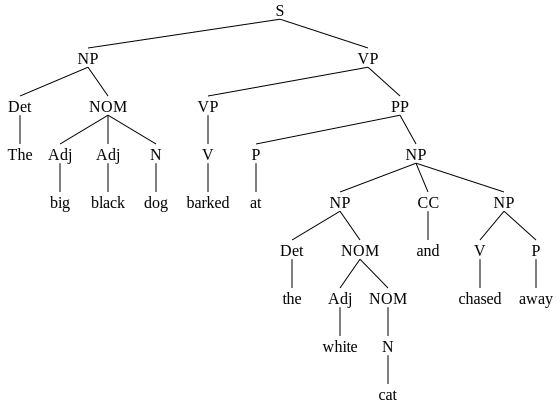

a


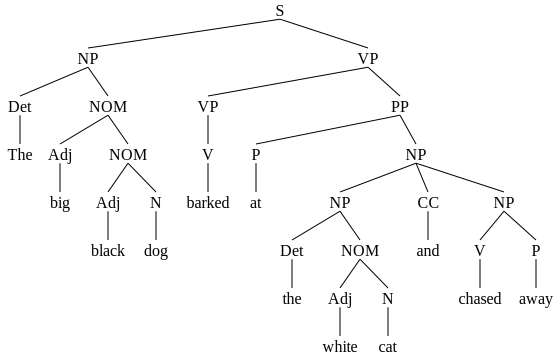

a


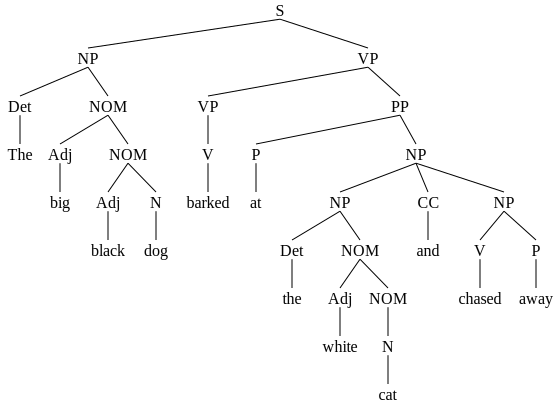

a


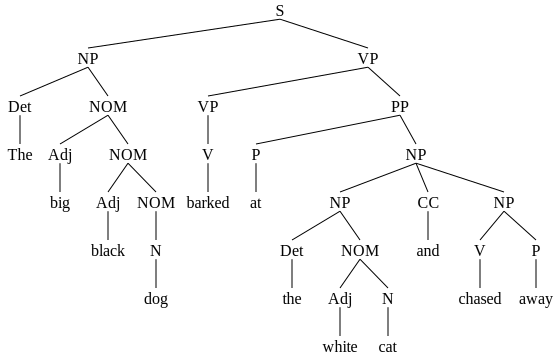

a


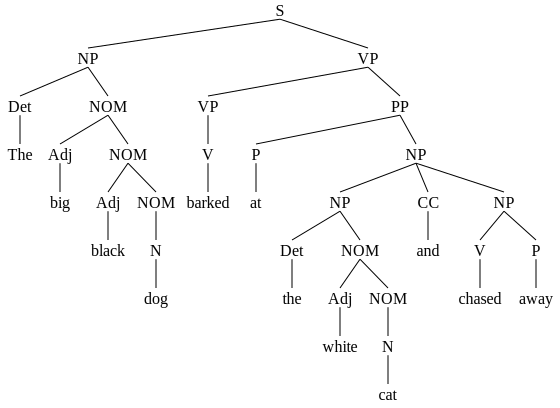

In [ ]:
import nltk

sentence = "The big black dog barked at the white cat and chased away"

text2 = nltk.CFG.fromstring("""
S -> NP VP | S CC S
NP -> Det NOM | Det N | NP CC NP | N | V P | PP NP | Det N PP
NOM -> Adj NOM | Adj N | Adj Adj N | N
VP -> V NP | VP PP | V | V NP PP | VP CC VP | Adj VP | VP Adj | V Adj
PP -> P NP
V -> 'barked' | 'chased'
Det -> 'the' | 'The'
CC -> 'and'
N -> 'dog' | 'cat' | N CC N
Adj -> 'big' | 'black' | 'white'
P -> 'at' | 'away'
""" )
text1 = nltk.tokenize.word_tokenize(sentence)
print(text1)
print()
parser = nltk.ChartParser(text2)
for tree in parser.parse(text1):
    display(tree)
